# Airbnb Data Analysis:
These tasks build on the foundational EDA and preprocessing already completed.

In [2]:
# Load necessary libraries and the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import shapiro, levene
import warnings
import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the processed dataset
data = pd.read_csv('processed_data.csv')



# GeoJSON path for neighbourhood boundaries
geojson_path = "nyc_boroughs.geojson"

# Outlier Handling
Detecting and handling outliers in the `price` column using the Interquartile Range (IQR) method.

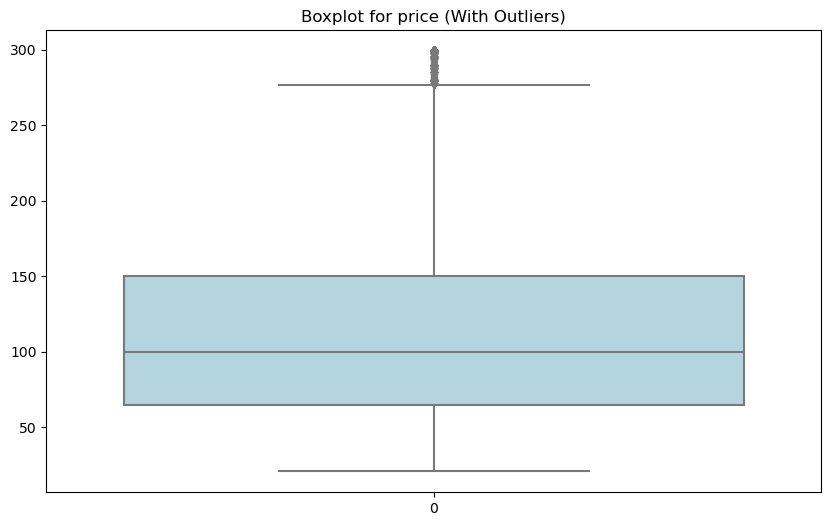

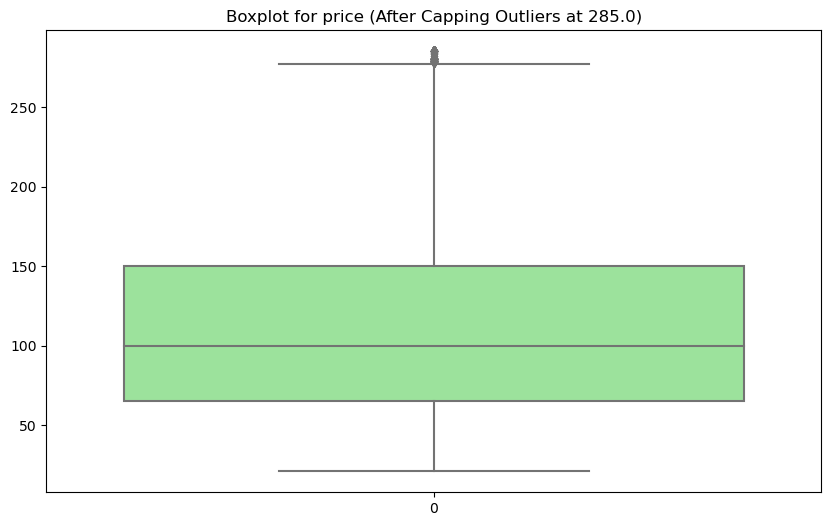

In [3]:
# Outlier Handling Code
def visualize_outliers(data, column, cap=None):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data[column], color='lightblue')
    plt.title(f'Boxplot for {column} (With Outliers)')
    plt.show()

    if cap:
        data = data[data[column] <= cap]
        plt.figure(figsize=(10, 6))
        sns.boxplot(data[column], color='lightgreen')
        plt.title(f'Boxplot for {column} (After Capping Outliers at {cap})')
        plt.show()
        return data
    return data

# Cap price outliers
price_cap = data['price'].quantile(0.99)
data_cleaned = visualize_outliers(data, 'price', cap=price_cap)

Above edited:

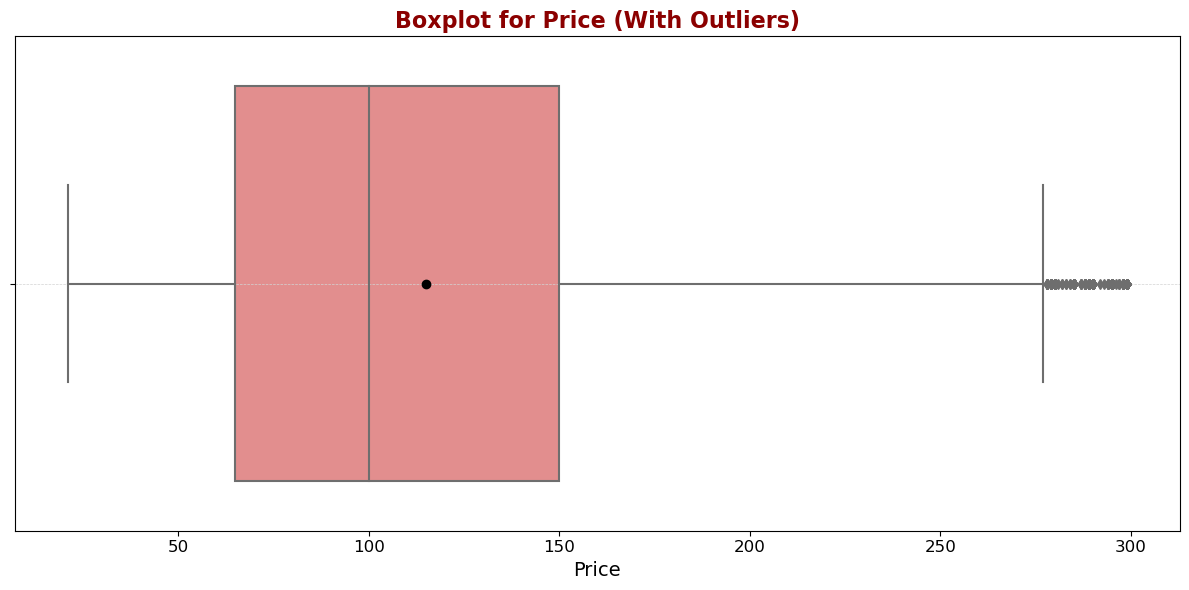

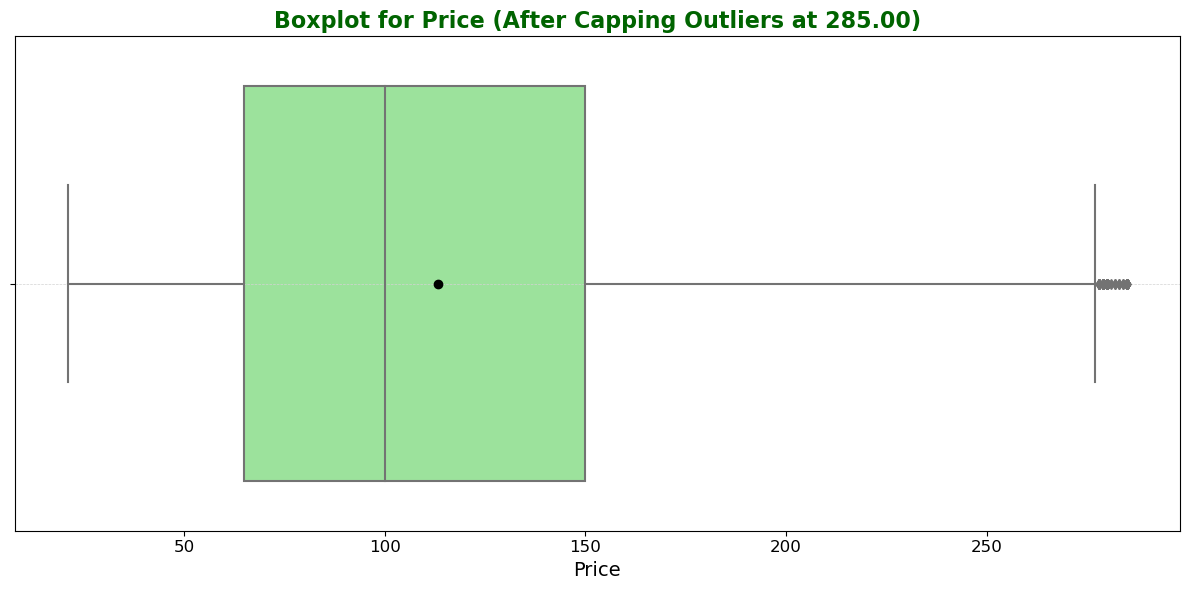

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_outliers(data, column, cap=None):
    plt.figure(figsize=(12, 6))
    sns.boxplot(
        x=data[column],
        color='lightcoral',
        linewidth=1.5,
        showmeans=True,  # Highlight the mean
        meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black"}
    )
    plt.title(f'Boxplot for {column.capitalize()} (With Outliers)', fontsize=16, color='darkred', fontweight='bold')
    plt.xlabel(column.capitalize(), fontsize=14)
    plt.xticks(fontsize=12)
    plt.grid(color='lightgrey', linestyle='--', linewidth=0.5, axis='y')
    plt.tight_layout()
    plt.show()


    if cap:
        capped_data = data[data[column] <= cap]
        plt.figure(figsize=(12, 6))
        sns.boxplot(
            x=capped_data[column],
            color='lightgreen',
            linewidth=1.5,
            showmeans=True,
            meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black"}
        )
        plt.title(f'Boxplot for {column.capitalize()} (After Capping Outliers at {cap:.2f})', fontsize=16, color='darkgreen', fontweight='bold')
        plt.xlabel(column.capitalize(), fontsize=14)
        plt.xticks(fontsize=12)
        plt.grid(color='lightgrey', linestyle='--', linewidth=0.5, axis='y')
        plt.tight_layout()
        plt.show()

        return capped_data

    return data

price_cap = data['price'].quantile(0.99)
data_cleaned = visualize_outliers(data, 'price', cap=price_cap)


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_outliers(data, column, cap=None):
    # Set a theme for the plots
    sns.set_theme(style="whitegrid", palette="pastel")
    
    # Plot the original boxplot with enhanced aesthetics
    plt.figure(figsize=(12, 7))
    sns.boxplot(
        x=data[column],
        color='skyblue',
        linewidth=2.5,
        flierprops=dict(markerfacecolor='red', markersize=8, linestyle='none')
    )
    plt.title(f'Boxplot for {column} (With Outliers)', fontsize=16, fontweight='bold')
    plt.xlabel(column.capitalize(), fontsize=14)
    plt.ylabel('Value Distribution', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

    # If a cap is provided, clean and replot
    if cap:
        data_cleaned = data[data[column] <= cap]
        
        # Plot the cleaned boxplot
        plt.figure(figsize=(12, 7))
        sns.boxplot(
            x=data_cleaned[column],
            color='lightgreen',
            linewidth=2.5,
            flierprops=dict(markerfacecolor='orange', markersize=8, linestyle='none')
        )
        plt.title(f'Boxplot for {column} (After Capping Outliers at {cap:.2f})', fontsize=16, fontweight='bold')
        plt.xlabel(column.capitalize(), fontsize=14)
        plt.ylabel('Value Distribution', fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.tight_layout()
        plt.show()

        return data_cleaned
    
    return data



# Enhanced Visualisations
Annotated boxplots to highlight trends in `price` and `availability_percentage`.

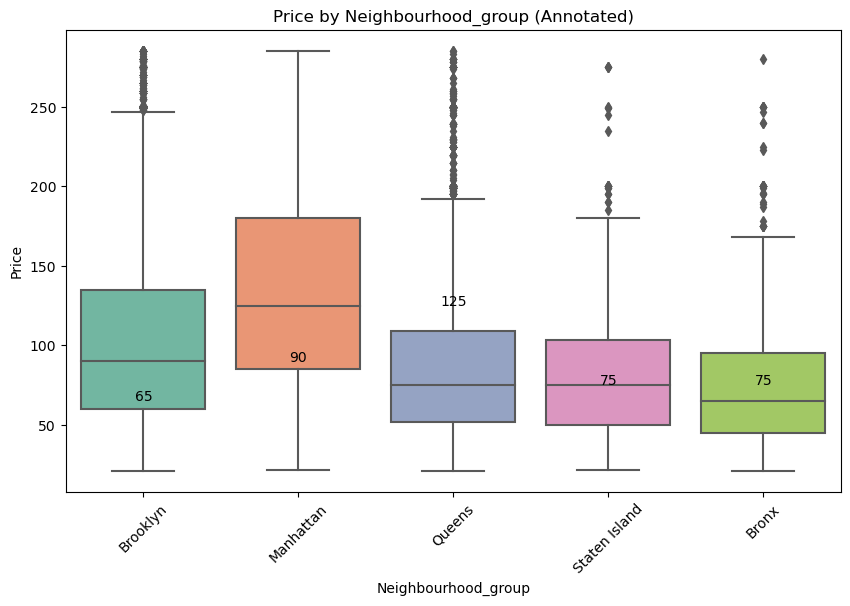

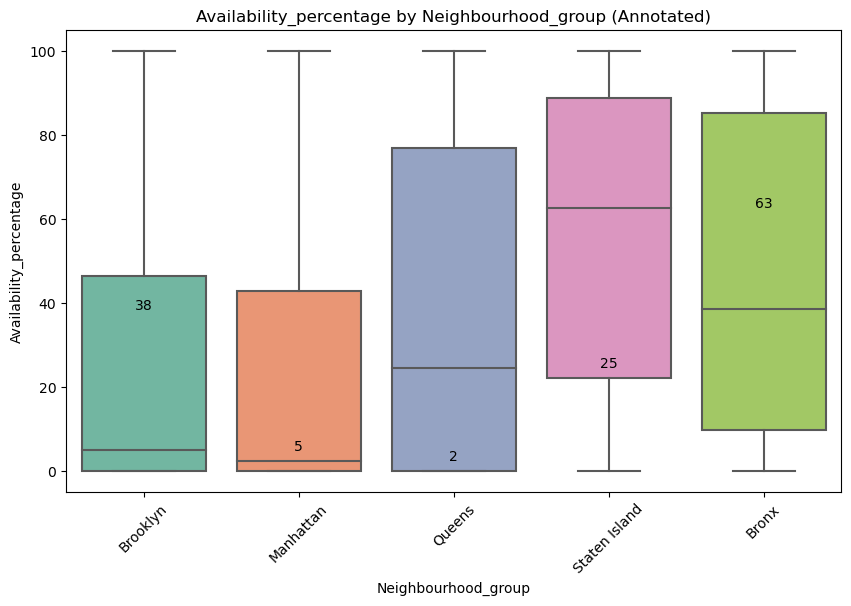

In [6]:
# Annotated Boxplots
def plot_boxplots_with_annotations(data, column, group_by):
    plt.figure(figsize=(10, 6))
    boxplot = sns.boxplot(data=data, x=group_by, y=column, palette='Set2')
    medians = data.groupby(group_by)[column].median()
    for tick, median in enumerate(medians):
        boxplot.text(tick, median, f'{median:.0f}', horizontalalignment='center', color='black')
    plt.title(f'{column.capitalize()} by {group_by.capitalize()} (Annotated)')
    plt.xlabel(group_by.capitalize())
    plt.ylabel(column.capitalize())
    plt.xticks(rotation=45)
    plt.show()

# Boxplots for Price and Availability
plot_boxplots_with_annotations(data_cleaned, 'price', 'neighbourhood_group')
plot_boxplots_with_annotations(data_cleaned, 'availability_percentage', 'neighbourhood_group')

Above edited:

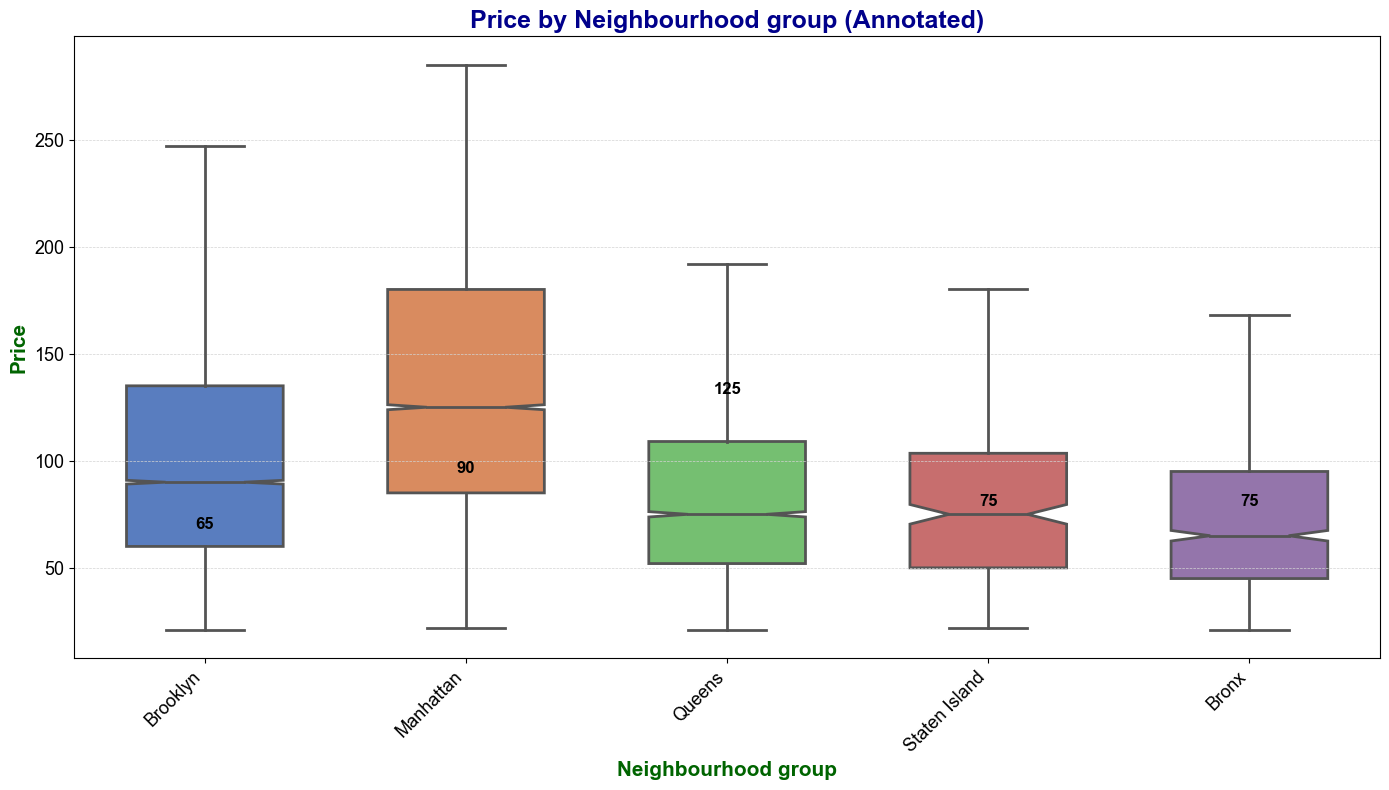

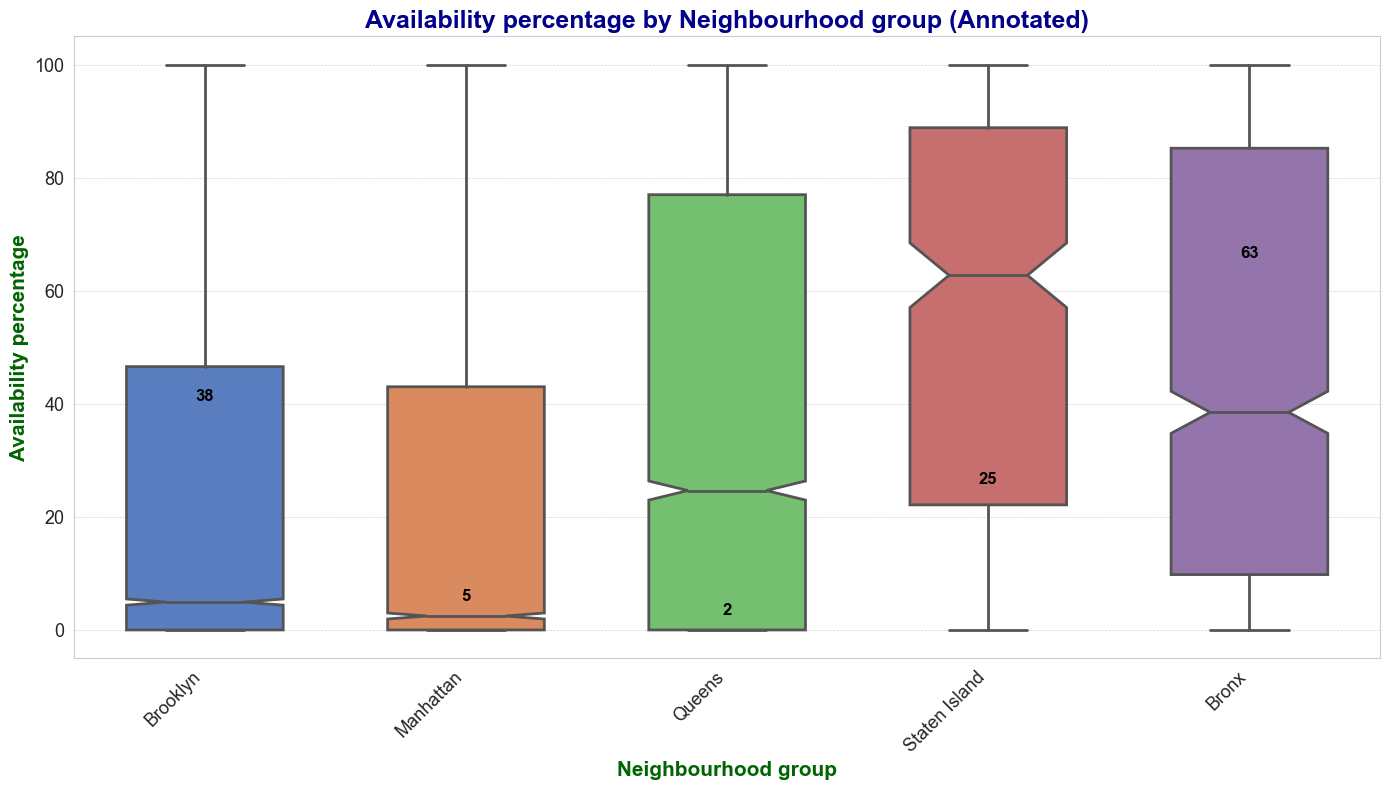

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplots_with_annotations(data, column, group_by):
  
    plt.figure(figsize=(14, 8))

    boxplot = sns.boxplot(
        data=data,
        x=group_by,
        y=column,
        palette='muted', 
        linewidth=2.0,   
        showfliers=False, 
        notch=True,      
        width=0.6         
    )

    sns.set_style('whitegrid')
    plt.grid(color='lightgrey', linestyle='--', linewidth=0.5, axis='y')

    medians = data.groupby(group_by)[column].median()

    for tick, median in enumerate(medians):
        boxplot.text(
            tick, median + (0.05 * median), 
            f'{median:.0f}', 
            horizontalalignment='center',
            fontsize=12,
            color='black',
            weight='bold'
        )


    plt.title(
        f'{column.replace("_", " ").capitalize()} by {group_by.replace("_", " ").capitalize()} (Annotated)',
        fontsize=18,
        fontweight='bold',
        color='darkblue'
    )
    plt.xlabel(group_by.replace("_", " ").capitalize(), fontsize=15, fontweight='bold', color='darkgreen')
    plt.ylabel(column.replace("_", " ").capitalize(), fontsize=15, fontweight='bold', color='darkgreen')

    
    plt.xticks(fontsize=13, rotation=45, ha='right')
    plt.yticks(fontsize=13)

    plt.tight_layout()

    plt.show()

plot_boxplots_with_annotations(data_cleaned, 'price', 'neighbourhood_group')
plot_boxplots_with_annotations(data_cleaned, 'availability_percentage', 'neighbourhood_group')


# Statistical Analysis
Conducting ANOVA or Kruskal-Wallis to test if pricing differs significantly across neighborhoods.

In [8]:
# Statistical Tests
from scipy.stats import f_oneway, kruskal

# Check assumptions and perform appropriate test
boroughs = data_cleaned['neighbourhood_group'].unique()
groups = [data_cleaned[data_cleaned['neighbourhood_group'] == borough]['price'] for borough in boroughs]
if all(shapiro(group)[1] > 0.05 for group in groups):
    result = f_oneway(*groups)
    print('ANOVA result:', result)
else:
    result = kruskal(*groups)
    print('Kruskal-Wallis result:', result)

Kruskal-Wallis result: KruskalResult(statistic=4491.681341287426, pvalue=0.0)


/Users/raluca/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# Clustering Analysis
Performing K-Means clustering on key metrics and visualising the results.

/Users/raluca/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/94/lsf46xv50vj3y3dmlgnr9_gr0000gn/T/ipykernel_28059/4049885985.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['cluster'] = kmeans.fit_predict(scaled_data)


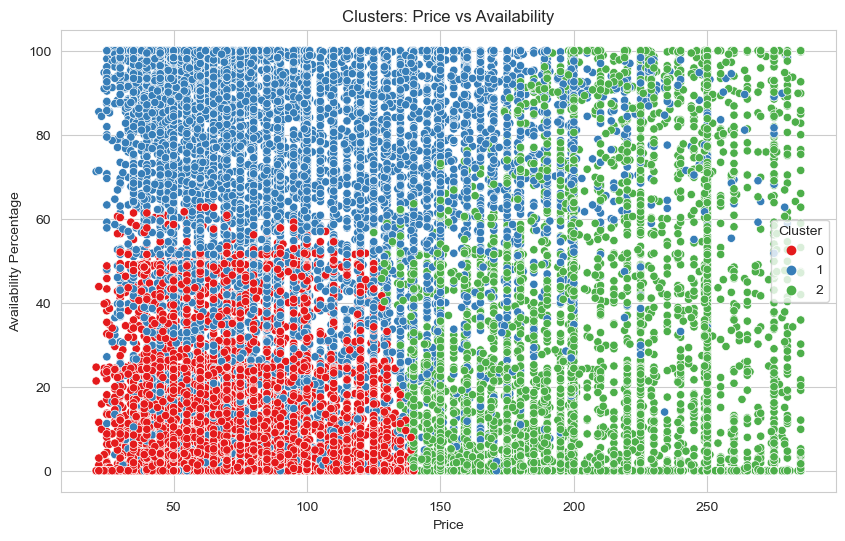

In [9]:
# Clustering Analysis
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cleaned[['price', 'availability_percentage', 'reviews_per_month']])

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
data_cleaned['cluster'] = kmeans.fit_predict(scaled_data)

# Visualise Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_cleaned['price'], y=data_cleaned['availability_percentage'], hue=data_cleaned['cluster'], palette='Set1')
plt.title('Clusters: Price vs Availability')
plt.xlabel('Price')
plt.ylabel('Availability Percentage')
plt.legend(title='Cluster')
plt.show()

Above edited:

/Users/raluca/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/94/lsf46xv50vj3y3dmlgnr9_gr0000gn/T/ipykernel_28059/723805790.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['cluster'] = kmeans.fit_predict(scaled_data)


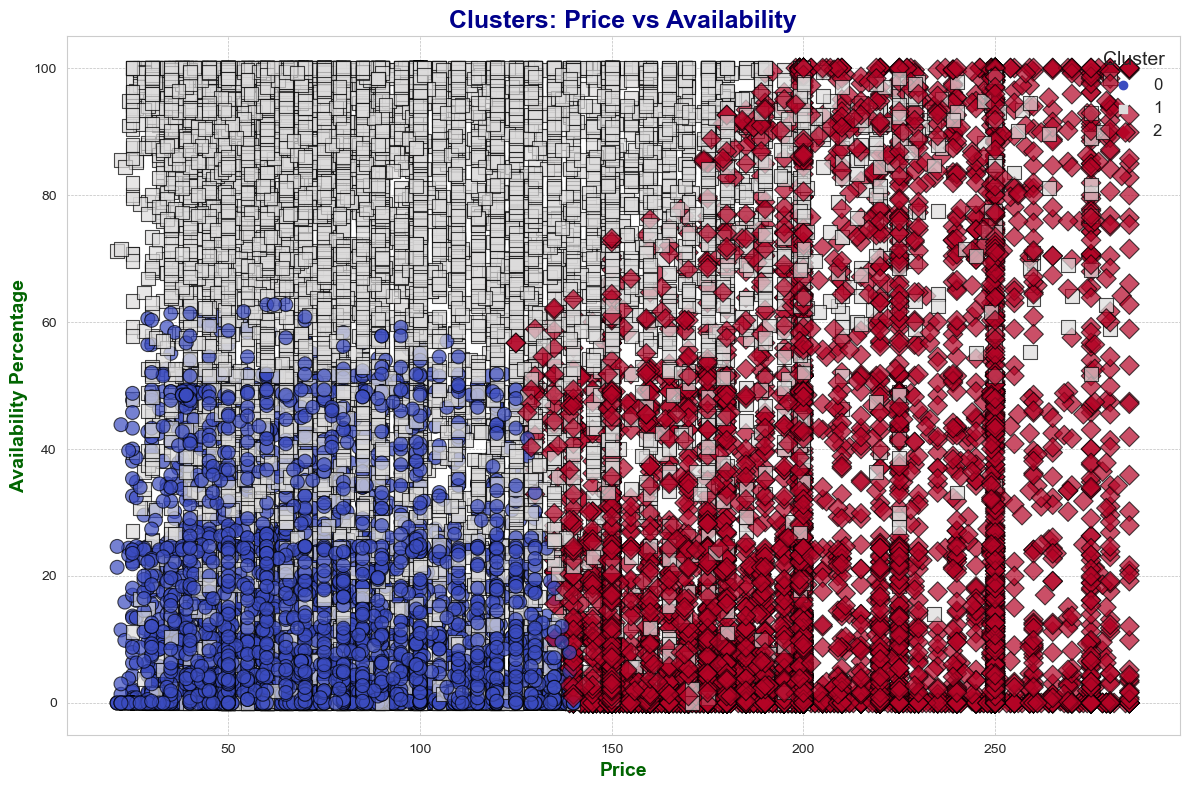

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cleaned[['price', 'availability_percentage', 'reviews_per_month']])

kmeans = KMeans(n_clusters=3, random_state=42)
data_cleaned['cluster'] = kmeans.fit_predict(scaled_data)

plt.figure(figsize=(12, 8))

sns.scatterplot(
    x=data_cleaned['price'],
    y=data_cleaned['availability_percentage'],
    hue=data_cleaned['cluster'],
    palette='coolwarm', 
    style=data_cleaned['cluster'], 
    markers=["o", "s", "D"], 
    s=100,  
    edgecolor='black',  
    alpha=0.7
)

plt.title('Clusters: Price vs Availability', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Price', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Availability Percentage', fontsize=14, fontweight='bold', color='darkgreen')


plt.legend(title='Cluster', loc='upper right', fontsize=12, title_fontsize=14, frameon=False)


plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

plt.tight_layout()


plt.show()


# Outlier Handling

Outliers in pricing can skew the results. We will use the IQR method to handle them.

In [11]:
def handle_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    return data

# Handle outliers in the price column
data = handle_outliers(data, 'price')
data['price'].describe()

count    40877.000000
mean       114.861132
std         61.686779
min         21.000000
25%         65.000000
50%        100.000000
75%        150.000000
max        277.500000
Name: price, dtype: float64

# Statistical Analysis

We will test whether pricing differs significantly still, after dealing with the outliers, across neighborhoods using ANOVA or Kruskal-Wallis.

In [12]:
groups = [data[data['neighbourhood_group'] == group]['price'] for group in data['neighbourhood_group'].unique()]

# Check normality and equal variance assumptions
normality = all(shapiro(group)[1] > 0.05 for group in groups)
variance = levene(*groups)[1] > 0.05

# Perform the appropriate test
if normality and variance:
    result = f_oneway(*groups)
    print('ANOVA result:', result)
else:
    result = kruskal(*groups)
    print('Kruskal-Wallis result:', result)

Kruskal-Wallis result: KruskalResult(statistic=4627.593557881785, pvalue=0.0)


/Users/raluca/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# Clustering Analysis

Clustering neighborhoods helps identify patterns and potential opportunities.

/Users/raluca/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


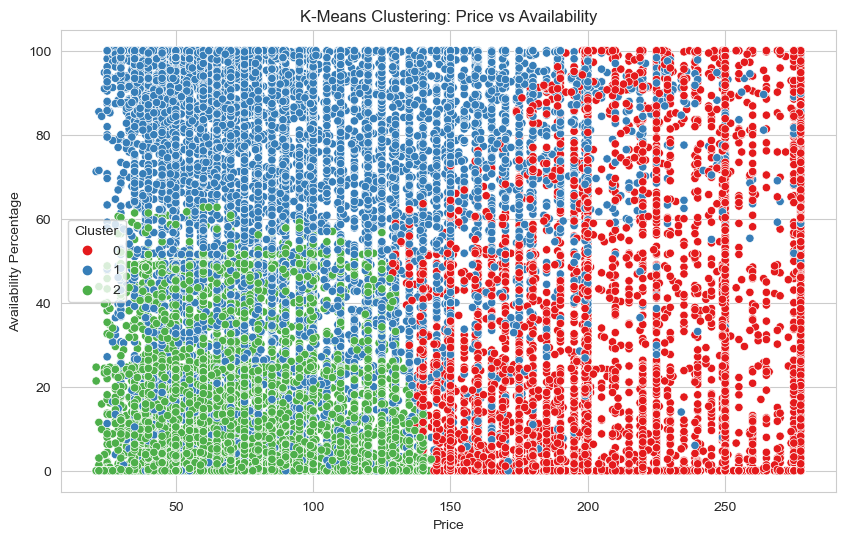

In [15]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['price', 'availability_percentage', 'reviews_per_month']])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['price'], y=data['availability_percentage'], hue=data['cluster'], palette='Set1')
plt.title('K-Means Clustering: Price vs Availability')
plt.xlabel('Price')
plt.ylabel('Availability Percentage')
plt.legend(title='Cluster')
plt.show()

Above edited

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['price', 'availability_percentage', 'reviews_per_month']])


kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_features)


plt.figure(figsize=(12, 8))


sns.scatterplot(
    x=data['price'], 
    y=data['availability_percentage'], 
    hue=data['cluster'], 
    palette='coolwarm',  
    style=data['cluster'], 
    markers=["o", "s", "D"],  
    s=120, 
    edgecolor='black', 
    alpha=0.8  

plt.title('K-Means Clustering: Price vs Availability', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Price', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Availability Percentage', fontsize=14, fontweight='bold', color='darkgreen')


plt.legend(title='Cluster', loc='upper right', fontsize=12, title_fontsize=14, frameon=False)


plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)


plt.tight_layout()

plt.show()


SyntaxError: '(' was never closed (3164306025.py, line 18)

# Demand and Availability Map

This map highlights neighborhoods based on demand and availability thresholds:
- **Green Markers:** High-demand, low-availability neighborhoods. These are ideal for new listings or increased pricing strategies.
- **Orange Markers:** Borderline neighborhoods with either moderately high demand or slightly low availability. These could represent potential opportunities.
- **Red Markers:** Neighborhoods to avoid due to low demand and high availability.

The thresholds are dynamically calculated using percentiles to adapt to the data distribution. The interactive popups include details about the neighborhood, such as average reviews, availability, price, and top listings.

In [16]:
availability_price_analysis = data.groupby(['neighbourhood_group', 'neighbourhood']).agg(
    avg_price=('price', 'mean'),
    avg_availability=('availability_percentage', 'mean'),
    avg_reviews=('reviews_per_month', 'mean'),
    listings_count=('neighbourhood', 'count')  # Count of listings in the neighbourhood
).reset_index()

# Refine thresholds dynamically using percentiles
availability_threshold = availability_price_analysis['avg_availability'].quantile(0.25)  # Low availability threshold (25th percentile)
review_threshold = availability_price_analysis['avg_reviews'].quantile(0.75)  # High demand threshold (75th percentile)

# Define tolerances for borderline cases using median-based flexibility
availability_tolerance = availability_price_analysis['avg_availability'].quantile(0.50)  # Median availability (50th percentile)
review_tolerance = availability_price_analysis['avg_reviews'].quantile(0.50)  # Median reviews (50th percentile)

In [17]:
# Generate data for price heatmap
price_heat_data = [
    [row['latitude'], row['longitude'], row['price']]
    for _, row in data.iterrows()
]

In [18]:
# Create high-demand, low-availability neighborhoods (Green Markers)
high_demand_low_availability = availability_price_analysis[
    (availability_price_analysis['avg_reviews'] >= review_threshold) &
    (availability_price_analysis['avg_availability'] <= availability_threshold)
]

# Create borderline neighborhoods (Orange Markers), excluding green markers
borderline_neighbourhoods = availability_price_analysis[
    ~availability_price_analysis['neighbourhood'].isin(high_demand_low_availability['neighbourhood']) & (
        ((availability_price_analysis['avg_reviews'] >= review_tolerance) &
         (availability_price_analysis['avg_availability'] <= availability_threshold)) |
        ((availability_price_analysis['avg_reviews'] >= review_threshold) &
         (availability_price_analysis['avg_availability'] <= availability_tolerance))
    )
]

# Create neighborhoods to avoid (Red Markers)
avoid_neighbourhoods = availability_price_analysis[
    (availability_price_analysis['avg_reviews'] <= review_threshold/5) &
    (availability_price_analysis['avg_availability'] >= availability_threshold/5)
]

# Function to generate popup content
def create_popup(row, category):
    # Example placeholder trend (replace with real calculations as needed)
    price_trend = "Price trend: Upward"
    
    # Top listings approximation using 'number_of_reviews'
    top_rated = data[data['neighbourhood'] == row['neighbourhood']].sort_values('number_of_reviews', ascending=False).head(3)
    top_listings = "<br>".join([
        f"- {listing['room_type']} (${listing['price']}, {listing['number_of_reviews']} reviews)"
        for _, listing in top_rated.iterrows()
    ])
    
    return folium.Popup(
        f"<b>{category}</b><br>"
        f"<b>Neighborhood:</b> {row['neighbourhood']}<br>"
        f"<b>Average Reviews:</b> {row['avg_reviews']:.2f}<br>"
        f"<b>Average Availability:</b> {row['avg_availability']:.2f}%<br>"
        f"<b>Average Price:</b> ${row['avg_price']:.2f}<br>"
        f"<b>{price_trend}</b><br>"
        f"<b>Top Listings:</b><br>{top_listings}",
        max_width=300
    )


# Create the flexible map
flexible_map_with_enhanced_markers = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Add price heatmap
HeatMap(price_heat_data, min_opacity=0.3, radius=10, blur=15).add_to(flexible_map_with_enhanced_markers)

# Add neighbourhood boundaries
folium.GeoJson(
    geojson_path,
    name="Neighbourhood Boundaries",
    style_function=lambda x: {
        'fillColor': 'none',
        'color': 'blue',
        'weight': 2
    }
).add_to(flexible_map_with_enhanced_markers)

# Add custom markers for high-demand, low-availability neighborhoods (Green)
for _, row in high_demand_low_availability.iterrows():
    latitude = data[data['neighbourhood'] == row['neighbourhood']]['latitude'].mean()
    longitude = data[data['neighbourhood'] == row['neighbourhood']]['longitude'].mean()
    if pd.notnull(latitude) and pd.notnull(longitude):
        folium.Marker(
            location=[latitude, longitude],
            popup=create_popup(row, "Ideal: High Demand, Low Availability"),
            icon=folium.Icon(color='green', icon='star', prefix='fa')  # Star icon
        ).add_to(flexible_map_with_enhanced_markers)

# Add custom markers for borderline neighborhoods (Orange)
for _, row in borderline_neighbourhoods.iterrows():
    latitude = data[data['neighbourhood'] == row['neighbourhood']]['latitude'].mean()
    longitude = data[data['neighbourhood'] == row['neighbourhood']]['longitude'].mean()
    if pd.notnull(latitude) and pd.notnull(longitude):
        folium.Marker(
            location=[latitude, longitude],
            popup=create_popup(row, "Potential Opportunity: Borderline Case"),
            icon=folium.Icon(color='orange', icon='circle', prefix='fa')  # Circle icon
        ).add_to(flexible_map_with_enhanced_markers)

# Add custom markers for areas to avoid (Red)
for _, row in avoid_neighbourhoods.iterrows():
    latitude = data[data['neighbourhood'] == row['neighbourhood']]['latitude'].mean()
    longitude = data[data['neighbourhood'] == row['neighbourhood']]['longitude'].mean()
    if pd.notnull(latitude) and pd.notnull(longitude):
        folium.Marker(
            location=[latitude, longitude],
            popup=create_popup(row, "Avoid: Low Demand, High Availability"),
            icon=folium.Icon(color='red', icon='exclamation-triangle', prefix='fa')  # Caution triangle
        ).add_to(flexible_map_with_enhanced_markers)

# Define our map legend
legend_html = """
<div style="
position: fixed; 
bottom: 50px; left: 50px; width: 350px; height: 130px; 
background-color: white; 
border: 2px solid grey; 
border-radius: 5px; 
z-index:9999; 
font-size:14px;
padding: 10px 15px; 
line-height: 1.8;">
<b>Legend</b><br>
<i class="fa fa-star" style="color: green; font-size: 16px; margin-right: 10px;"></i>
Ideal: High Demand, Low Availability<br>
<i class="fa fa-circle" style="color: orange; font-size: 16px; margin-right: 10px;"></i>
Potential Opportunity: Borderline Case<br>
<i class="fa fa-exclamation-triangle" style="color: red; font-size: 16px; margin-right: 10px;"></i>
Avoid: Low Demand, High Availability
</div>
"""

flexible_map_with_enhanced_markers.get_root().html.add_child(folium.Element(legend_html))

# Save the map
flexible_map_with_enhanced_markers.save("../visualisations/map.html")
print("Enhanced map saved as '../visualisations/map.html'.")

FileNotFoundError: [Errno 2] No such file or directory: '../visualisations/map.html'

# Neighborhood Clustering Map

This additional map groups neighborhoods into clusters based on key metrics:
- **Price:** The average price of listings in the neighborhood.
- **Demand:** Represented by the average number of reviews.
- **Availability:** The percentage of days listings are available.

Each cluster highlights neighborhoods with similar characteristics, helping to identify patterns or distinct types of areas. For example, neighborhoods in the same cluster might share similar pricing strategies or listing availability trends.

In [20]:
from sklearn.cluster import KMeans
from folium.plugins import MarkerCluster, HeatMap

# Refine thresholds dynamically using percentiles
availability_threshold = availability_price_analysis['avg_availability'].quantile(0.25)  # Low availability threshold (25th percentile)
review_threshold = availability_price_analysis['avg_reviews'].quantile(0.75)  # High demand threshold (75th percentile)

# Define tolerances for borderline cases using median-based flexibility
availability_tolerance = availability_price_analysis['avg_availability'].quantile(0.50)  # Median availability (50th percentile)
review_tolerance = availability_price_analysis['avg_reviews'].quantile(0.50)  # Median reviews (50th percentile)

# Assign a marker type for each neighborhood
def get_marker_type(row):
    if row['avg_reviews'] >= review_threshold and row['avg_availability'] <= availability_threshold:
        return 'green'  # High-demand, low-availability
    elif row['avg_reviews'] <= review_threshold / 5 and row['avg_availability'] >= availability_threshold / 5:
        return 'red'  # Avoidable neighborhoods
    else:
        return 'orange'  # Borderline cases

# Add marker type column
availability_price_analysis['marker_type'] = availability_price_analysis.apply(get_marker_type, axis=1)

# Create high-demand, low-availability neighborhoods (Green)
high_demand_low_availability = availability_price_analysis[availability_price_analysis['marker_type'] == 'green']

# Create borderline neighborhoods (Orange)
borderline_neighbourhoods = availability_price_analysis[availability_price_analysis['marker_type'] == 'orange']

# Create neighborhoods to avoid (Red)
avoid_neighbourhoods = availability_price_analysis[availability_price_analysis['marker_type'] == 'red']

# Merge latitude and longitude into availability_price_analysis if missing
availability_price_analysis = availability_price_analysis.merge(
    data[['neighbourhood', 'latitude', 'longitude']],
    on='neighbourhood',
    how='left'
)

# Verify latitude and longitude presence
if 'latitude' not in availability_price_analysis.columns or 'longitude' not in availability_price_analysis.columns:
    raise KeyError("The 'latitude' and 'longitude' columns are missing after the merge.")

# Prepare data for K-means clustering
features = availability_price_analysis[['avg_price', 'avg_reviews', 'avg_availability']].dropna()  # Select clustering features
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
availability_price_analysis['cluster'] = kmeans.fit_predict(features)

# Cluster color assignment based on dominant marker type in the cluster
cluster_marker_summary = availability_price_analysis.groupby('cluster')['marker_type'].value_counts().unstack(fill_value=0)

# Assign dominant color to each cluster
def assign_cluster_color(row):
    if row['green'] >= row['orange'] and row['green'] >= row['red']:
        return 'green'
    elif row['red'] >= row['green'] and row['red'] >= row['orange']:
        return 'red'
    else:
        return 'orange'

cluster_marker_summary['cluster_color'] = cluster_marker_summary.apply(assign_cluster_color, axis=1)

# Define the popup creation function
def create_popup(row, category):
    # Example placeholder trend (replace with real calculations as needed)
    price_trend = "Price trend: Upward"
    
    # Top listings approximation using 'number_of_reviews'
    top_rated = data[data['neighbourhood'] == row['neighbourhood']].sort_values('number_of_reviews', ascending=False).head(3)
    top_listings = "<br>".join([
        f"- {listing['room_type']} (${listing['price']}, {listing['number_of_reviews']} reviews)"
        for _, listing in top_rated.iterrows()
    ])
    
    return folium.Popup(
        f"<b>{category}</b><br>"
        f"<b>Neighborhood:</b> {row['neighbourhood']}<br>"
        f"<b>Average Reviews:</b> {row['avg_reviews']:.2f}<br>"
        f"<b>Average Availability:</b> {row['avg_availability']:.2f}%<br>"
        f"<b>Average Price:</b> ${row['avg_price']:.2f}<br>"
        f"<b>{price_trend}</b><br>"
        f"<b>Top Listings:</b><br>{top_listings}",
        max_width=300
    )

# Create the clustered map
clustered_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)
marker_cluster = MarkerCluster().add_to(clustered_map)

# Add price heatmap
HeatMap(price_heat_data, min_opacity=0.3, radius=10, blur=15).add_to(clustered_map)

# Add borough boundaries
folium.GeoJson(
    geojson_path,
    name="Neighbourhood Boundaries",
    style_function=lambda x: {
        'fillColor': 'none',
        'color': 'blue',
        'weight': 2
    }
).add_to(clustered_map)

# Add individual markers for each neighborhood
for _, row in availability_price_analysis.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    marker_type = row['marker_type']
    
    if pd.notnull(latitude) and pd.notnull(longitude):
        folium.Marker(
            location=[latitude, longitude],
            popup=create_popup(row, f"Neighborhood Type: {marker_type.capitalize()}"),
            icon=folium.Icon(color=marker_type, icon='info-sign')
        ).add_to(marker_cluster)

# Add cluster markers with dominant colors
for cluster_id, row in cluster_marker_summary.iterrows():
    cluster_data = availability_price_analysis[availability_price_analysis['cluster'] == cluster_id]
    latitude = cluster_data['latitude'].mean()
    longitude = cluster_data['longitude'].mean()
    cluster_color = row['cluster_color']
    
    folium.Marker(
        location=[latitude, longitude],
        popup=(
            f"<b>Cluster {cluster_id}</b><br>"
            f"Dominant Color: {cluster_color}<br>"
            f"Total Green: {row['green']}<br>"
            f"Total Orange: {row['orange']}<br>"
            f"Total Red: {row['red']}"
        ),
        icon=folium.Icon(color=cluster_color, icon='info-sign')
    ).add_to(clustered_map)

# Define a custom legend
legend_html = """
<div style="
position: fixed; 
bottom: 50px; left: 50px; width: 350px; height: 130px; 
background-color: white; 
border: 2px solid grey; 
border-radius: 5px; 
z-index:9999; 
font-size:14px;
padding: 10px 15px; 
line-height: 1.8;">
<b>Legend</b><br>
<i class="fa fa-star" style="color: green; font-size: 16px; margin-right: 10px;"></i>
Ideal: High Demand, Low Availability<br>
<i class="fa fa-circle" style="color: orange; font-size: 16px; margin-right: 10px;"></i>
Potential Opportunity: Borderline Case<br>
<i class="fa fa-exclamation-triangle" style="color: red; font-size: 16px; margin-right: 10px;"></i>
Avoid: Low Demand, High Availability
</div>
"""

clustered_map.get_root().html.add_child(folium.Element(legend_html))

# Save the clustered map
clustered_map.save("../visualisations/clustered_map_with_dominant_colors.html")
print("Clustered map with dominant colors saved as '../visualisations/clustered_map_with_dominant_colors.html'.")


KeyError: "The 'latitude' and 'longitude' columns are missing after the merge."

In [21]:
from folium.plugins import MarkerCluster
import geopandas as gpd

# Load GeoJSON data for neighborhoods if centroids are needed
geo_data = gpd.read_file(geojson_path)
geo_data['centroid'] = geo_data['geometry'].centroid

# Create a clustered map
clustered_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)
marker_cluster = MarkerCluster().add_to(clustered_map)

# Add markers to the cluster for high-demand neighborhoods (Green)
for _, row in high_demand_low_availability.iterrows():
    centroid = geo_data[geo_data['BoroName'] == row['neighbourhood']]['centroid']
    latitude = centroid.y.values[0] if not centroid.empty else data[data['neighbourhood'] == row['neighbourhood']]['latitude'].mean()
    longitude = centroid.x.values[0] if not centroid.empty else data[data['neighbourhood'] == row['neighbourhood']]['longitude'].mean()
    
    if pd.notnull(latitude) and pd.notnull(longitude):
        folium.Marker(
            location=[latitude, longitude],
            popup=create_popup(row, "Ideal: High Demand, Low Availability"),
            icon=folium.Icon(color='green', icon='star', prefix='fa')
        ).add_to(marker_cluster)

# Add markers to the cluster for borderline neighborhoods (Orange)
for _, row in borderline_neighbourhoods.iterrows():
    centroid = geo_data[geo_data['BoroName'] == row['neighbourhood']]['centroid']
    latitude = centroid.y.values[0] if not centroid.empty else data[data['neighbourhood'] == row['neighbourhood']]['latitude'].mean()
    longitude = centroid.x.values[0] if not centroid.empty else data[data['neighbourhood'] == row['neighbourhood']]['longitude'].mean()
    
    if pd.notnull(latitude) and pd.notnull(longitude):
        folium.Marker(
            location=[latitude, longitude],
            popup=create_popup(row, "Potential Opportunity: Borderline Case"),
            icon=folium.Icon(color='orange', icon='circle', prefix='fa')
        ).add_to(marker_cluster)

# Add markers to the cluster for areas to avoid (Red)
for _, row in avoid_neighbourhoods.iterrows():
    centroid = geo_data[geo_data['BoroName'] == row['neighbourhood']]['centroid']
    latitude = centroid.y.values[0] if not centroid.empty else data[data['neighbourhood'] == row['neighbourhood']]['latitude'].mean()
    longitude = centroid.x.values[0] if not centroid.empty else data[data['neighbourhood'] == row['neighbourhood']]['longitude'].mean()
    
    if pd.notnull(latitude) and pd.notnull(longitude):
        folium.Marker(
            location=[latitude, longitude],
            popup=create_popup(row, "Avoid: Low Demand, High Availability"),
            icon=folium.Icon(color='red', icon='exclamation-triangle', prefix='fa')
        ).add_to(marker_cluster)

# Save the clustered map
clustered_map.save("../visualisations/clustered_map.html")
print("Clustered map saved as '../visualisations/clustered_map.html'.")

ModuleNotFoundError: No module named 'geopandas'

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features for clustering
features = availability_price_analysis[['avg_price', 'avg_reviews', 'avg_availability']]

# Handle missing values (if any)
features = features.dropna()

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert back to a DataFrame for clarity
scaled_features_df = pd.DataFrame(scaled_features, columns=['avg_price', 'avg_reviews', 'avg_availability'])

In [23]:
import matplotlib.pyplot as plt

# Calculate inertia for different k values
inertia = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

/Users/raluca/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/raluca/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KeyboardInterrupt: 

In [ ]:
# Apply k-means clustering with the optimal number of clusters
optimal_k = 3  # Determined from the Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
features['cluster'] = kmeans.fit_predict(scaled_features)

availability_price_analysis['cluster'] = features['cluster']

In [ ]:
# Assign colours to clusters
cluster_colors = ['blue', 'purple', 'cyan']  # Adjust as needed for more clusters

# Add markers for each cluster
for _, row in availability_price_analysis.iterrows():
    latitude = data[data['neighbourhood'] == row['neighbourhood']]['latitude'].mean()
    longitude = data[data['neighbourhood'] == row['neighbourhood']]['longitude'].mean()
    cluster_label = row['cluster']
    
    if pd.notnull(latitude) and pd.notnull(longitude):
        folium.Marker(
            location=[latitude, longitude],
            popup=f"Neighborhood: {row['neighbourhood']}<br>Cluster: {cluster_label}",
            icon=folium.Icon(color=cluster_colors[cluster_label], icon='info-sign')
        ).add_to(clustered_map)

# Save the map with clusters
clustered_map.save("visualisations/clustered_map_with_kmeans.html")
print("Clustered map with k-means saved as '../visualisations/clustered_map_with_kmeans.html'.")


# Multiple regression
We define untapped potential as:
- **Low Price - High Demand:** Neighbourhoods with lower than expected prices relative to their popularity might indicate opportunities for higher pricing.
- **High Availability - Low competition:** Neighbourhoods with a high procentage of available days but few reviews might indicate potential room for growth. 

The dependant variables can be price and availability_percentage whist the independent variables can be neighbourhood_group, room_type, minimum_nights, number_of_reviews, reviews_per_month, distance_to_landmarks or availability_percentage.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [25]:
data = pd.read_csv('processed_data.csv')
data


neighbourhood_group       neighbourhood  latitude  longitude  \
0                Brooklyn          Kensington  40.64749  -73.97237   
1               Manhattan             Midtown  40.75362  -73.98377   
2               Manhattan              Harlem  40.80902  -73.94190   
3                Brooklyn        Clinton Hill  40.68514  -73.95976   
4               Manhattan         East Harlem  40.79851  -73.94399   
...                   ...                 ...       ...        ...   
40872            Brooklyn  Bedford-Stuyvesant  40.67853  -73.94995   
40873            Brooklyn            Bushwick  40.70184  -73.93317   
40874           Manhattan              Harlem  40.81475  -73.94867   
40875           Manhattan      Hell's Kitchen  40.75751  -73.99112   
40876           Manhattan      Hell's Kitchen  40.76404  -73.98933   

             room_type  price  minimum_nights  number_of_reviews  \
0         Private room    149               1                  9   
1      Entire home/apt    225               1                 40   
2         Private room    150               3                  0   
3      Entire home/apt     89               1                 40   
4      Entire home/apt     80              10                  9   
...                ...    ...             ...                ...   
40872     Private room     70               2                  0   
40873     Private room     40               4                  0   
40874  Entire home/apt    115              10                  0   
40875      Shared room     55               1                  0   
40876     Private room     90               7                  0   

       reviews_per_month  calculated_host_listings_count  \
0                   0.21                               6   
1                   0.38                               2   
2                   0.00                               1   
3                   4.64                               1   
4                   0.10                               1   
...                  ...                             ...   
40872               0.00                               2   
40873               0.00                               2   
40874               0.00                               1   
40875               0.00                               6   
40876               0.00                               1   

       distance_to_Times_Square  distance_to_Statue_of_Liberty  \
0                     12.337898                       7.649799   
1                      0.508366                       8.803656   
2                      6.757240                      15.881167   
3                      8.387034                       7.159264   
4                      5.701496                      14.813350   
...                         ...                            ...   
40872                  9.330755                       8.060359   
40873                  7.644594                       9.490478   
40874                  7.030987                      16.126283   
40875                  0.476484                       8.827830   
40876                  0.745067                       9.532372   

       distance_to_Central_Park  distance_to_Empire_State_Building  \
0                     15.305378                          11.318587   
1                      3.734987                           0.553268   
2                      3.465981                           7.632440   
3                     11.138311                           7.401157   
4                      2.532135                           6.535489   
...                         ...                                ...   
40872                 11.950489                           8.365442   
40873                  9.719627                           6.829215   
40874                  3.687813                           7.958724   
40875                  3.620038                           1.081736   
40876                  2.935950                           1.7266

# Price

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = data[['neighbourhood_group', 'neighbourhood', 'room_type', 'minimum_nights', 'number_of_reviews',
          'reviews_per_month', 'calculated_host_listings_count', 'distance_to_Times_Square',
          'distance_to_Statue_of_Liberty', 'distance_to_Central_Park', 'distance_to_Empire_State_Building',
          'distance_to_Brooklyn_Bridge', 'distance_to_One_World_Trade_Center', 'distance_to_Metropolitan_Museum_of_Art']]
y = data['price']  

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['minimum_nights', 'number_of_reviews', 'reviews_per_month',
                                   'calculated_host_listings_count', 'distance_to_Times_Square',
                                   'distance_to_Statue_of_Liberty', 'distance_to_Central_Park',
                                   'distance_to_Empire_State_Building', 'distance_to_Brooklyn_Bridge',
                                   'distance_to_One_World_Trade_Center', 'distance_to_Metropolitan_Museum_of_Art']),
        
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['neighbourhood_group', 'neighbourhood', 'room_type'])
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

print(f"Training R-squared: {model.score(X_train, y_train)}")
print(f"Test R-squared: {model.score(X_test, y_test)}")

Training R-squared: 0.5365612165151818
Test R-squared: 0.527005711297084


Training R-Squared = 53% in the variance is explained by the model features. It is usual to have moderate r-squares for housing models due to variability in pricing.  This is a good starting point but it an be improved. 
Test R-squared = model is not overfitting and generalises relatively well to unknown data. 

Improvement strategies;.
- Feature engineering such as reviews_to_listing_ratio by dividing number_of_reviews by calculated_host_listings_count.
- Combine neighbourhood_group with room_type to capture localized price effects
- Adding external data such as crime rates by neigbourhood, public transport, demographic information to help explain price variation

In [27]:
data['predicted_price'] = model.predict(X)
neighbourhood_analysis = data.groupby('neighbourhood')[['price', 'predicted_price']].mean()
neighbourhood_analysis['price_gap'] = neighbourhood_analysis['predicted_price'] - neighbourhood_analysis['price']
neighbourhood_analysis.sort_values('price_gap', ascending=False, inplace=True)

print(neighbourhood_analysis.head()) 


                        price  predicted_price   price_gap
neighbourhood                                             
Castleton Corners  171.333333       281.031329  109.697996
New Dorp            57.000000       121.839629   64.839629
Belle Harbor       146.000000       179.660903   33.660903
Emerson Hill        68.200000       100.024010   31.824010
Huguenot           118.333333       140.459281   22.125948


Positive price gaps indicate that the predicted values are higher than the actual price which might suggest that the neigbourhoods are undervalued. Further reaserch looking into each neighbourhood would be useful in particular looking at the demographics, safety, public transport and other amnities.

With the current dbs we can check if neighbourhood has a large price gap but low demand (e.g., low number_of_reviews or reviews_per_month), as it may indicate a lack of awareness rather than untapped potential. Conversely, high demand and a price gap might confirm real untapped potential.


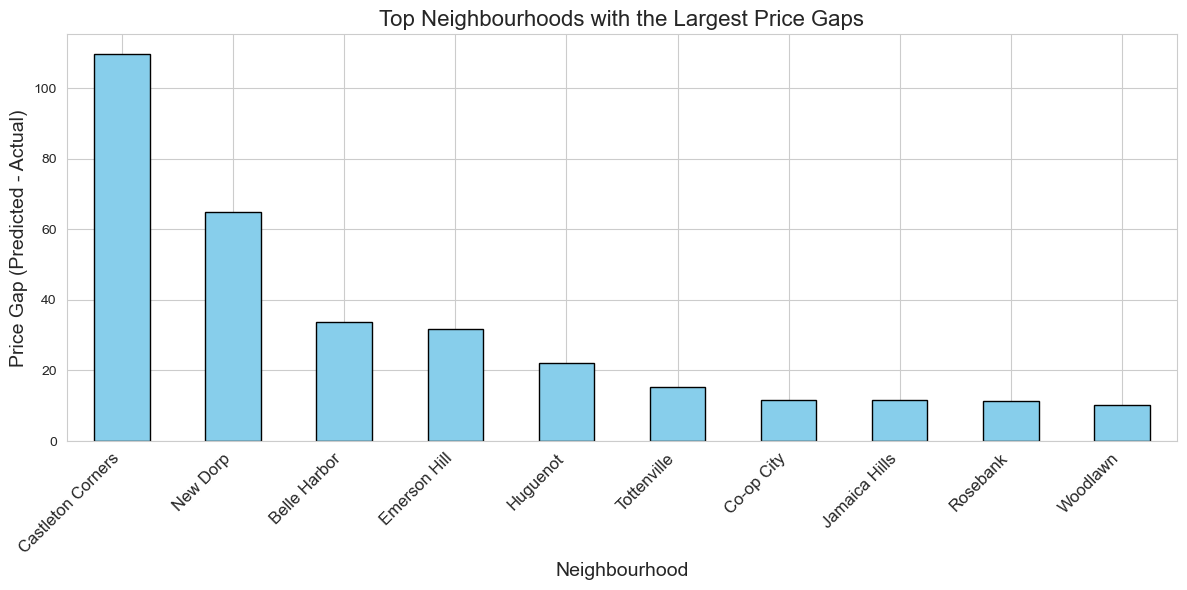

In [28]:
import matplotlib.pyplot as plt


top_neighbourhoods = neighbourhood_analysis.head(10)  

plt.figure(figsize=(12, 6))
top_neighbourhoods['price_gap'].plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Top Neighbourhoods with the Largest Price Gaps', fontsize=16)
plt.xlabel('Neighbourhood', fontsize=14)
plt.ylabel('Price Gap (Predicted - Actual)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


# Availability

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = data[['neighbourhood_group', 'neighbourhood', 'room_type', 'minimum_nights', 'number_of_reviews',
          'reviews_per_month', 'calculated_host_listings_count', 'distance_to_Times_Square',
          'distance_to_Statue_of_Liberty', 'distance_to_Central_Park', 'distance_to_Empire_State_Building',
          'distance_to_Brooklyn_Bridge', 'distance_to_One_World_Trade_Center', 'distance_to_Metropolitan_Museum_of_Art']]
y = data['availability_percentage'] 

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['minimum_nights', 'number_of_reviews', 'reviews_per_month',
                                   'calculated_host_listings_count', 'distance_to_Times_Square',
                                   'distance_to_Statue_of_Liberty', 'distance_to_Central_Park',
                                   'distance_to_Empire_State_Building', 'distance_to_Brooklyn_Bridge',
                                   'distance_to_One_World_Trade_Center', 'distance_to_Metropolitan_Museum_of_Art']),
        
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['neighbourhood_group', 'neighbourhood', 'room_type'])
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

print(f"Training R-squared: {model.score(X_train, y_train)}")
print(f"Test R-squared: {model.score(X_test, y_test)}")

Training R-squared: 0.2520801980259787
Test R-squared: 0.22630191310220693


Low R-Square: this suggests that the model predicts about 25% of the variance in the data and 22% in the test data. There is minimal overfitting, and the overallexplnatory power of this model is low. 

Some ideas as of why:
Availability is influenced by seasonality, individual host preferences. Missing features such as seasonality, local events etc. 
Data might have complex non-linear interactions

In [30]:

data['predicted_availability'] = model.predict(X)

neighbourhood_analysis = data.groupby('neighbourhood')[['availability_percentage', 'predicted_availability']].mean()

neighbourhood_analysis['availability_gap'] = (
    neighbourhood_analysis['predicted_availability'] - neighbourhood_analysis['availability_percentage']
)

neighbourhood_analysis.sort_values('availability_gap', ascending=False, inplace=True)

print(neighbourhood_analysis.head())


                   availability_percentage  predicted_availability  \
neighbourhood                                                        
Castleton Corners                35.616438               87.447926   
Silver Lake                      44.383562               90.074510   
New Dorp                          0.000000               37.530637   
Co-op City                       99.726027              131.970081   
Eltingville                      52.876712               72.377501   

                   availability_gap  
neighbourhood                        
Castleton Corners         51.831488  
Silver Lake               45.690948  
New Dorp                  37.530637  
Co-op City                32.244053  
Eltingville               19.500789  


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Calculate the sum of reviews for each neighborhood and merge it with the main dataset
reviews_sum = data.groupby('neighbourhood')['number_of_reviews'].sum().rename('sum_of_reviews')
data = data.merge(reviews_sum, on='neighbourhood')

# Define the features and target variable
X = data[['neighbourhood_group', 'neighbourhood', 'price', 'sum_of_reviews',
          'distance_to_Times_Square', 'distance_to_Statue_of_Liberty', 
          'distance_to_Central_Park', 'distance_to_Empire_State_Building',
          'distance_to_Brooklyn_Bridge', 'distance_to_One_World_Trade_Center', 
          'distance_to_Metropolitan_Museum_of_Art']]
y = data['availability_percentage'] 

# Define preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['price', 'sum_of_reviews',
                                   'distance_to_Times_Square', 'distance_to_Statue_of_Liberty',
                                   'distance_to_Central_Park', 'distance_to_Empire_State_Building',
                                   'distance_to_Brooklyn_Bridge', 'distance_to_One_World_Trade_Center',
                                   'distance_to_Metropolitan_Museum_of_Art']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['neighbourhood_group', 'neighbourhood'])
    ])

# Create the pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Evaluate the model
print(f"Training R-squared: {model.score(X_train, y_train):.4f}")
print(f"Test R-squared: {model.score(X_test, y_test):.4f}")



Training R-squared: 0.1077
Test R-squared: 0.0969


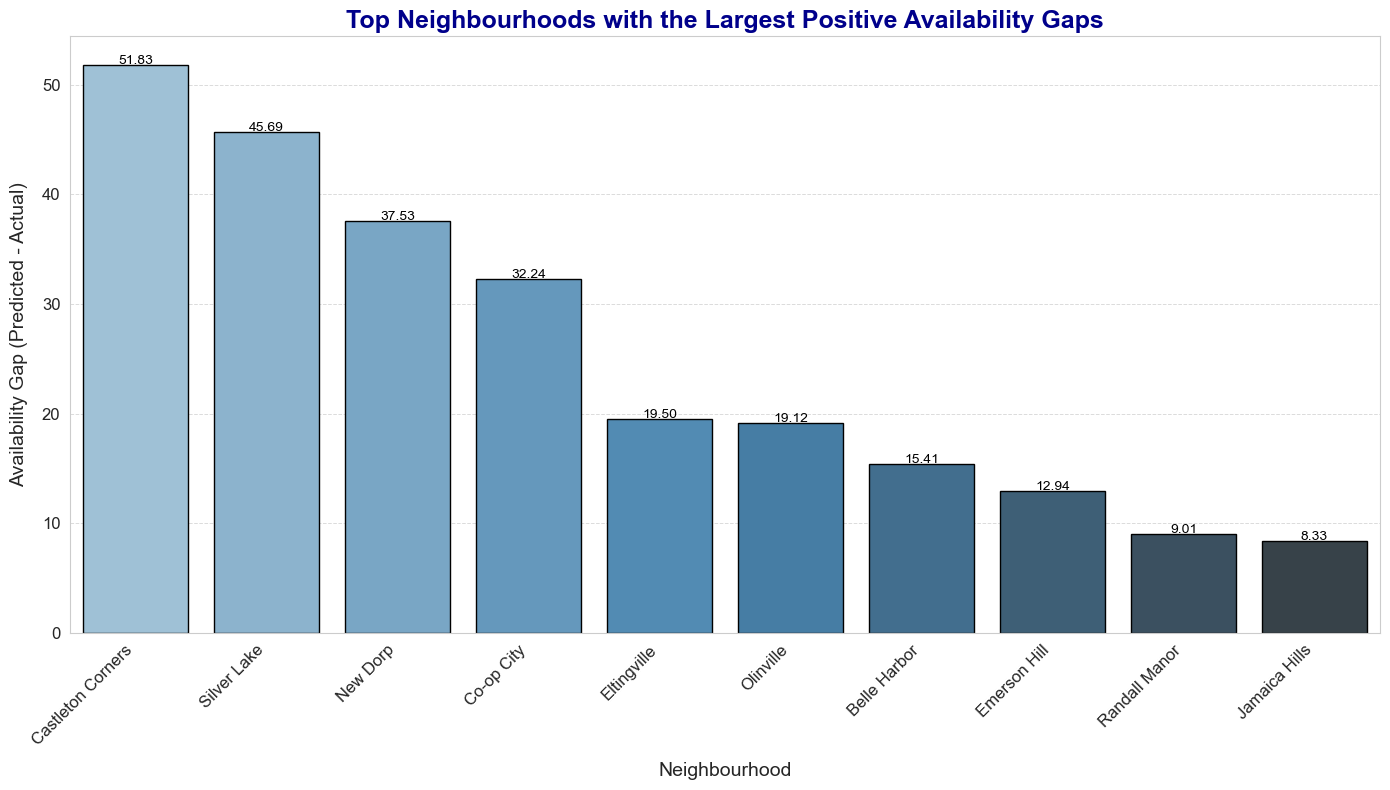

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract top neighbourhoods with the largest positive availability gaps
top_neighbourhoods = neighbourhood_analysis.head(10)

# Create the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(
    x=top_neighbourhoods.index,
    y=top_neighbourhoods['availability_gap'],
    palette='Blues_d',
    edgecolor='black'
)

# Enhance aesthetics
plt.title('Top Neighbourhoods with the Largest Positive Availability Gaps', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Neighbourhood', fontsize=14, labelpad=10)
plt.ylabel('Availability Gap (Predicted - Actual)', fontsize=14, labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Annotate bars with gap values
for index, value in enumerate(top_neighbourhoods['availability_gap']):
    plt.text(index, value + 0.1, f'{value:.2f}', ha='center', fontsize=10, color='black')

# Improve layout and display the plot
plt.tight_layout()
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Prepare data (assume `data` is already loaded as a DataFrame)
data['sum_of_reviews'] = data.groupby('neighbourhood')['number_of_reviews'].transform('sum')

X = data[['neighbourhood_group', 'neighbourhood', 'room_type', 'price', 'sum_of_reviews',
          'distance_to_Times_Square', 'distance_to_Statue_of_Liberty', 'distance_to_Central_Park',
          'distance_to_Empire_State_Building', 'distance_to_Brooklyn_Bridge',
          'distance_to_One_World_Trade_Center', 'distance_to_Metropolitan_Museum_of_Art']]

y = data['availability_percentage']

# Preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['price', 'sum_of_reviews', 'distance_to_Times_Square',
                                   'distance_to_Statue_of_Liberty', 'distance_to_Central_Park',
                                   'distance_to_Empire_State_Building', 'distance_to_Brooklyn_Bridge',
                                   'distance_to_One_World_Trade_Center', 'distance_to_Metropolitan_Museum_of_Art']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['neighbourhood_group', 'neighbourhood', 'room_type'])
    ])

# Define pipeline with Random Forest
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Evaluate the model
print(f"Training R-squared: {model.score(X_train, y_train):.4f}")
print(f"Test R-squared: {model.score(X_test, y_test):.4f}")


Training R-squared: 0.8783
Test R-squared: 0.1411


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Prepare data (assume `data` is already loaded as a DataFrame)
data['sum_of_reviews'] = data.groupby('neighbourhood')['number_of_reviews'].transform('sum')

# Change target variable to price instead of availability_percentage
X = data[['neighbourhood_group', 'neighbourhood', 'room_type', 'sum_of_reviews',
          'distance_to_Times_Square', 'distance_to_Statue_of_Liberty', 'distance_to_Central_Park',
          'distance_to_Empire_State_Building', 'distance_to_Brooklyn_Bridge',
          'distance_to_One_World_Trade_Center', 'distance_to_Metropolitan_Museum_of_Art']]

y = data['price']  # Set target to 'price'

# Preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['sum_of_reviews', 'distance_to_Times_Square',
                                   'distance_to_Statue_of_Liberty', 'distance_to_Central_Park',
                                   'distance_to_Empire_State_Building', 'distance_to_Brooklyn_Bridge',
                                   'distance_to_One_World_Trade_Center', 'distance_to_Metropolitan_Museum_of_Art']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['neighbourhood_group', 'neighbourhood', 'room_type'])
    ])

# Define pipeline with Random Forest
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Evaluate the model
print(f"Training R-squared: {model.score(X_train, y_train):.4f}")
print(f"Test R-squared: {model.score(X_test, y_test):.4f}")


Training R-squared: 0.9257
Test R-squared: 0.4709


Training R-squared: 0.9257
Test R-squared: 0.4709


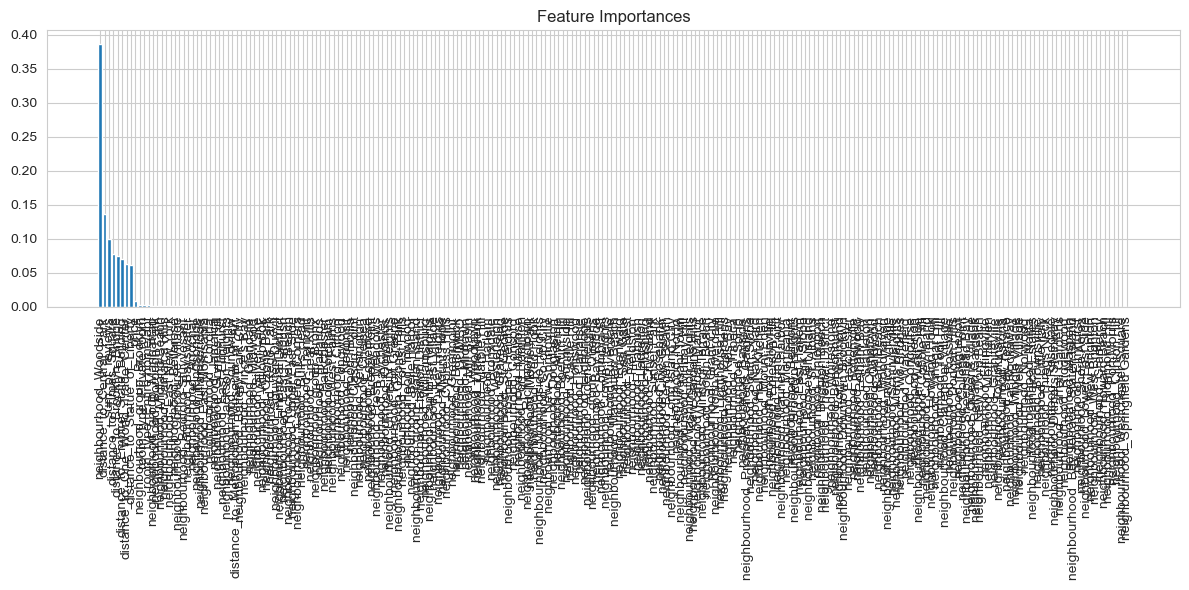

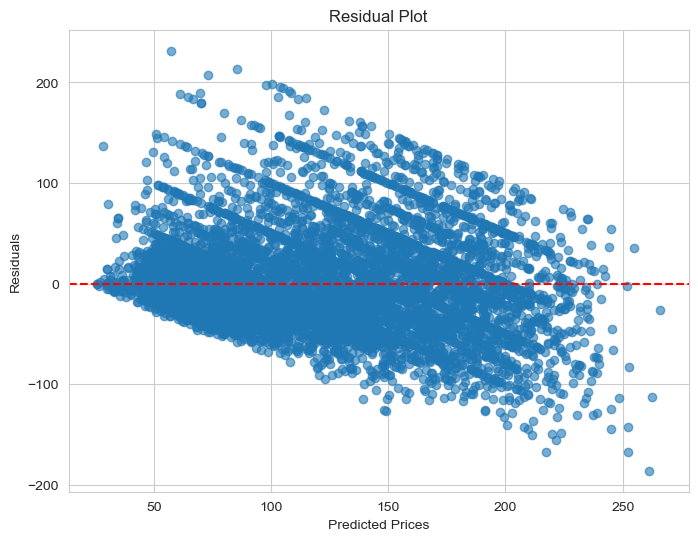

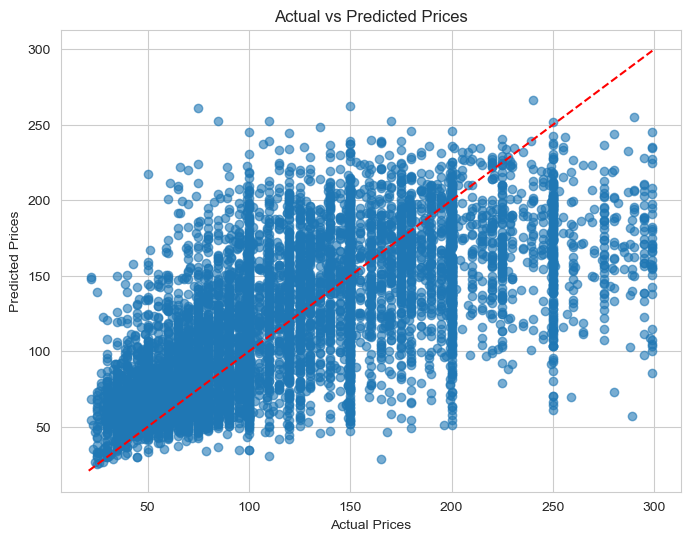

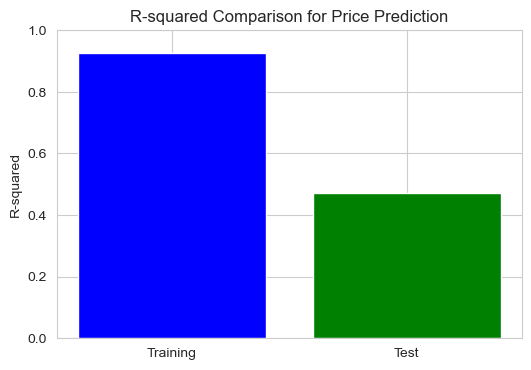

In [39]:
# Update target variable to 'price'
y = data['price']

# Split the data (keeping the same features `X`)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Evaluate the model
print(f"Training R-squared: {model.score(X_train, y_train):.4f}")
print(f"Test R-squared: {model.score(X_test, y_test):.4f}")

# Visualizations
# Get feature importances from the Random Forest model
importances = model.named_steps['regressor'].feature_importances_

# Sort feature importances for plotting
indices = np.argsort(importances)[::-1]

# Feature Importance Plot
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

# Residual Plot
y_pred = model.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.show()

# Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--")
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

# R-squared Comparison Bar Chart
scores = [model.score(X_train, y_train), model.score(X_test, y_test)]
labels = ['Training', 'Test']

plt.figure(figsize=(6, 4))
plt.bar(labels, scores, color=['blue', 'green'])
plt.title("R-squared Comparison for Price Prediction")
plt.ylabel("R-squared")
plt.ylim(0, 1)
plt.show()


RandomForest Price with max depth limited at 7

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Prepare data (assume `data` is already loaded as a DataFrame)
data['sum_of_reviews'] = data.groupby('neighbourhood')['number_of_reviews'].transform('sum')

X = data[['neighbourhood_group', 'neighbourhood', 'room_type', 'sum_of_reviews',
          'distance_to_Times_Square', 'distance_to_Statue_of_Liberty', 'distance_to_Central_Park',
          'distance_to_Empire_State_Building', 'distance_to_Brooklyn_Bridge',
          'distance_to_One_World_Trade_Center', 'distance_to_Metropolitan_Museum_of_Art']]

y = data['price']  # Changed target variable to 'price'

# Preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['sum_of_reviews', 'distance_to_Times_Square',
                                   'distance_to_Statue_of_Liberty', 'distance_to_Central_Park',
                                   'distance_to_Empire_State_Building', 'distance_to_Brooklyn_Bridge',
                                   'distance_to_One_World_Trade_Center', 'distance_to_Metropolitan_Museum_of_Art']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['neighbourhood_group', 'neighbourhood', 'room_type'])
    ])

# Define pipeline with Random Forest, limit max depth to 7
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, max_depth=7))  # Added max_depth
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Evaluate the model
print(f"Training R-squared: {model.score(X_train, y_train):.4f}")
print(f"Test R-squared: {model.score(X_test, y_test):.4f}")


Training R-squared: 0.5507
Test R-squared: 0.5414


RandomForest Price with max depth limited at 6

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Prepare data (assume `data` is already loaded as a DataFrame)
data['sum_of_reviews'] = data.groupby('neighbourhood')['number_of_reviews'].transform('sum')

X = data[['neighbourhood_group', 'neighbourhood', 'room_type', 'sum_of_reviews',
          'distance_to_Times_Square', 'distance_to_Statue_of_Liberty', 'distance_to_Central_Park',
          'distance_to_Empire_State_Building', 'distance_to_Brooklyn_Bridge',
          'distance_to_One_World_Trade_Center', 'distance_to_Metropolitan_Museum_of_Art']]

y = data['price']  # Changed target variable to 'price'

# Preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['sum_of_reviews', 'distance_to_Times_Square',
                                   'distance_to_Statue_of_Liberty', 'distance_to_Central_Park',
                                   'distance_to_Empire_State_Building', 'distance_to_Brooklyn_Bridge',
                                   'distance_to_One_World_Trade_Center', 'distance_to_Metropolitan_Museum_of_Art']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['neighbourhood_group', 'neighbourhood', 'room_type'])
    ])

# Define pipeline with Random Forest, limit max depth to 6
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, max_depth=6))  # Added max_depth
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Evaluate the model
print(f"Training R-squared: {model.score(X_train, y_train):.4f}")
print(f"Test R-squared: {model.score(X_test, y_test):.4f}")

Training R-squared: 0.5394
Test R-squared: 0.5405


RandomForest Price with max depth limited at 5

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Prepare data (assume `data` is already loaded as a DataFrame)
data['sum_of_reviews'] = data.groupby('neighbourhood')['number_of_reviews'].transform('sum')

X = data[['neighbourhood_group', 'neighbourhood', 'room_type', 'sum_of_reviews',
          'distance_to_Times_Square', 'distance_to_Statue_of_Liberty', 'distance_to_Central_Park',
          'distance_to_Empire_State_Building', 'distance_to_Brooklyn_Bridge',
          'distance_to_One_World_Trade_Center', 'distance_to_Metropolitan_Museum_of_Art']]

y = data['price']  # Changed target variable to 'price'

# Preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['sum_of_reviews', 'distance_to_Times_Square',
                                   'distance_to_Statue_of_Liberty', 'distance_to_Central_Park',
                                   'distance_to_Empire_State_Building', 'distance_to_Brooklyn_Bridge',
                                   'distance_to_One_World_Trade_Center', 'distance_to_Metropolitan_Museum_of_Art']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['neighbourhood_group', 'neighbourhood', 'room_type'])
    ])

# Define pipeline with Random Forest, limit max depth to 5
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5))  # Added max_depth
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Evaluate the model
print(f"Training R-squared: {model.score(X_train, y_train):.4f}")
print(f"Test R-squared: {model.score(X_test, y_test):.4f}")

Training R-squared: 0.5300
Test R-squared: 0.5377


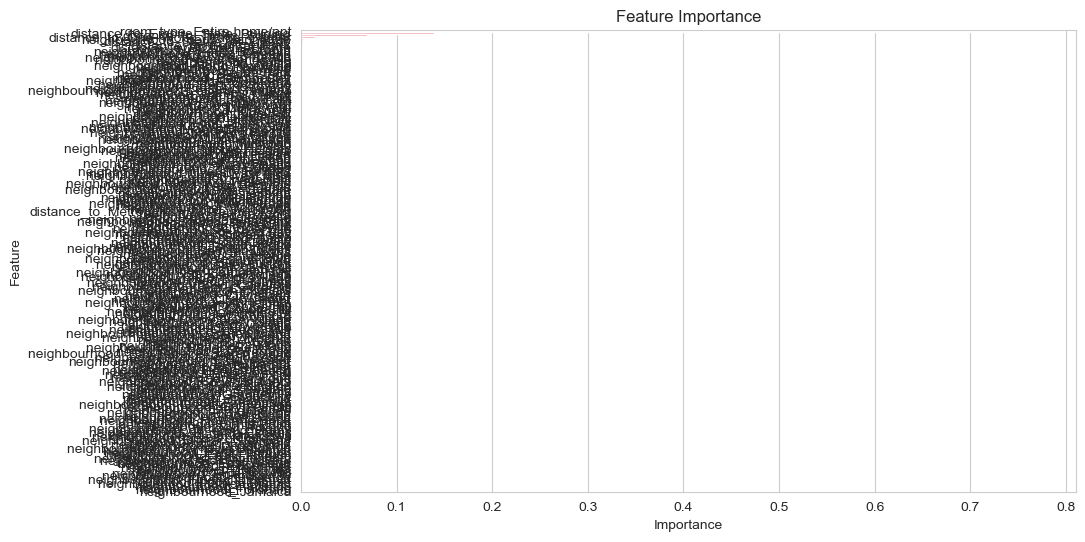

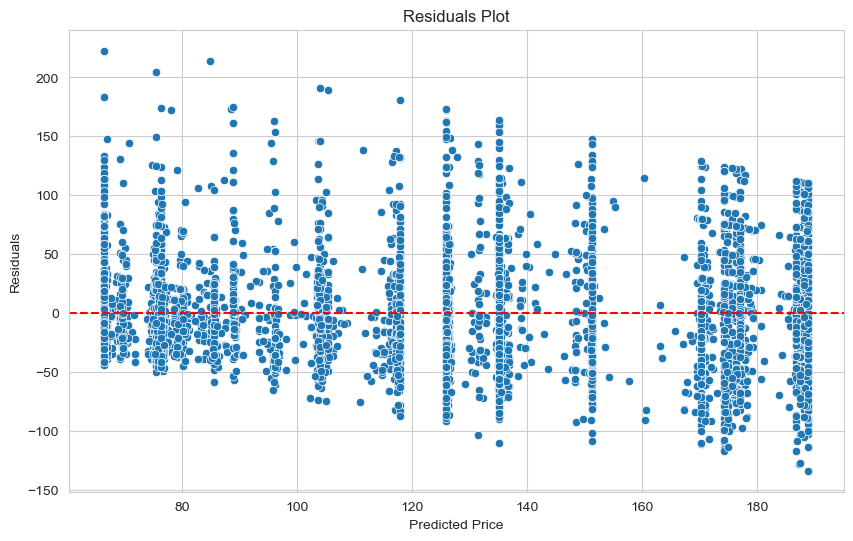

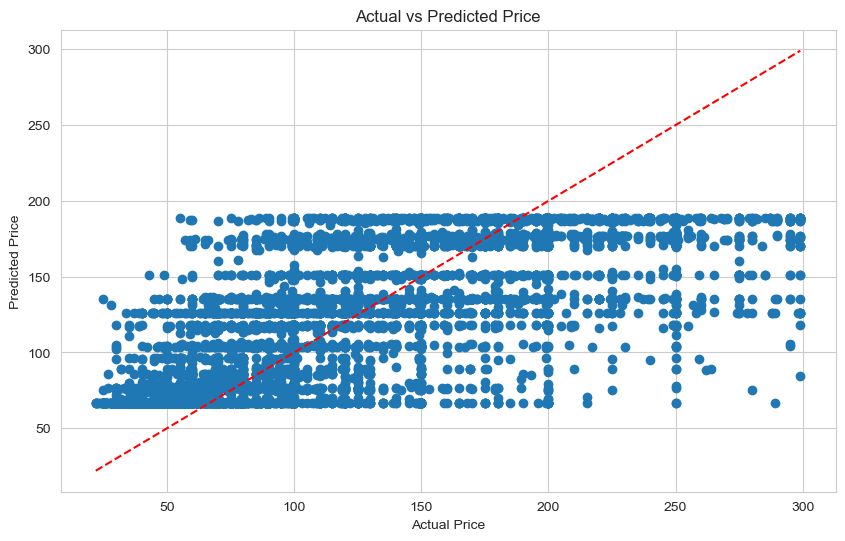

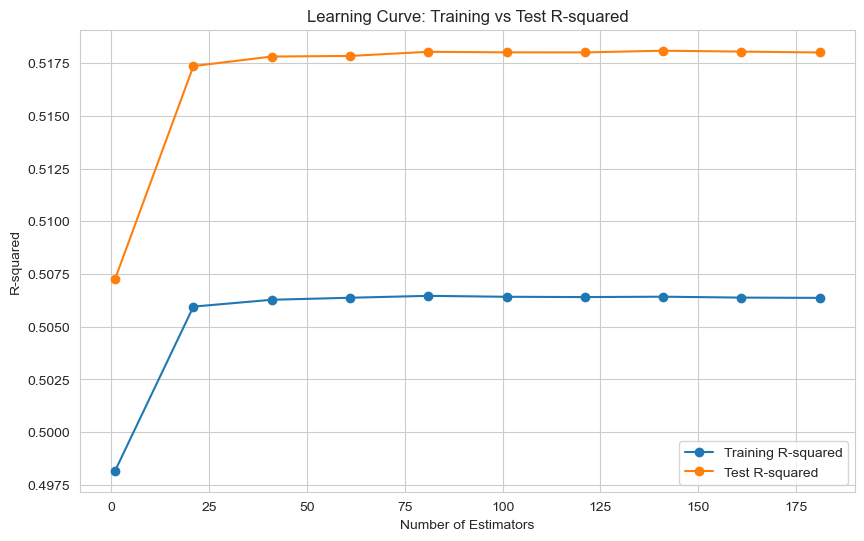

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Feature Importance Plot
def plot_feature_importance(model, X):
    # Extract feature importance from the fitted model
    importances = model.named_steps['regressor'].feature_importances_

    # Get the column names after transformation (post one-hot encoding)
    feature_names = model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(input_features=X.select_dtypes(include='object').columns)
    feature_names = np.concatenate([X.select_dtypes(exclude='object').columns, feature_names])

    # Create a DataFrame for better visualization
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Feature Importance')
    plt.show()

# 2. Residuals Plot
def plot_residuals(model, X_test, y_test):
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('Predicted Price')
    plt.ylabel('Residuals')
    plt.title('Residuals Plot')
    plt.show()

# 3. Predicted vs Actual Plot
def plot_predicted_vs_actual(model, X_test, y_test):
    y_pred = model.predict(X_test)

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs Predicted Price')
    plt.show()

# 4. Learning Curve (Training vs Test R-squared)
def plot_learning_curve(model, X_train, y_train, X_test, y_test):
    train_scores = []
    test_scores = []
    n_estimators_range = range(1, 201, 20)

    for n_estimators in n_estimators_range:
        model.named_steps['regressor'].n_estimators = n_estimators
        model.fit(X_train, y_train)
        train_scores.append(model.score(X_train, y_train))
        test_scores.append(model.score(X_test, y_test))

    plt.figure(figsize=(10, 6))
    plt.plot(n_estimators_range, train_scores, label='Training R-squared', marker='o')
    plt.plot(n_estimators_range, test_scores, label='Test R-squared', marker='o')
    plt.xlabel('Number of Estimators')
    plt.ylabel('R-squared')
    plt.title('Learning Curve: Training vs Test R-squared')
    plt.legend()
    plt.show()

# Call the functions after model training

# Feature Importance
plot_feature_importance(model, X_train)

# Residuals Plot
plot_residuals(model, X_test, y_test)

# Predicted vs Actual Plot
plot_predicted_vs_actual(model, X_test, y_test)

# Learning Curve
plot_learning_curve(model, X_train, y_train, X_test, y_test)


In [47]:
import numpy as np
import pandas as pd

# Predict prices using the trained model
y_pred = model.predict(X_test)

# Create a DataFrame to compare actual vs predicted prices
comparison_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred
})

# Calculate the min, max, average, and quartiles for both actual and predicted prices
statistics = comparison_df.describe().T[['min', '25%', '50%', '75%', 'max', 'mean']]

# Display the statistics for actual vs predicted prices
print("Statistics for Actual vs Predicted Prices:")
print(statistics)


Statistics for Actual vs Predicted Prices:
                       min        25%         50%         75%         max  \
Actual Price     22.000000  65.000000  100.000000  150.000000  299.000000   
Predicted Price  66.358711  66.418048  117.520517  151.454927  188.923513   

                       mean  
Actual Price     114.726884  
Predicted Price  115.295819  


In [49]:
# Add the neighbourhood column to the X_test DataFrame for grouping purposes
X_test_with_neighbourhood = X_test.copy()
X_test_with_neighbourhood['neighbourhood'] = data.loc[X_test.index, 'neighbourhood']

# Predict prices using the trained model
y_pred = model.predict(X_test)

# Create a DataFrame to compare actual vs predicted prices, including the neighbourhood
comparison_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred,
    'neighbourhood': X_test_with_neighbourhood['neighbourhood']
})

# Group by neighbourhood and calculate the statistics for actual vs predicted prices
statistics_by_neighbourhood = comparison_df.groupby('neighbourhood').agg(
    min_actual=('Actual Price', 'min'),
    q1_actual=('Actual Price', lambda x: np.percentile(x, 25)),
    median_actual=('Actual Price', 'median'),
    q3_actual=('Actual Price', lambda x: np.percentile(x, 75)),
    max_actual=('Actual Price', 'max'),
    mean_actual=('Actual Price', 'mean'),
    
    min_predicted=('Predicted Price', 'min'),
    q1_predicted=('Predicted Price', lambda x: np.percentile(x, 25)),
    median_predicted=('Predicted Price', 'median'),
    q3_predicted=('Predicted Price', lambda x: np.percentile(x, 75)),
    max_predicted=('Predicted Price', 'max'),
    mean_predicted=('Predicted Price', 'mean')
)

# Display the grouped statistics
print("Statistics by Neighbourhood:")
print(statistics_by_neighbourhood)



Statistics by Neighbourhood:
                 min_actual  q1_actual  median_actual  q3_actual  max_actual  \
neighbourhood                                                                  
Allerton                 33       38.0           49.0      66.00          80   
Arrochar                 33       33.5           34.0      34.50          35   
Arverne                  35       90.5          137.0     150.00         250   
Astoria                  27       65.0           90.0     125.00         250   
Bath Beach               45       48.0           74.0      99.25         100   
...                     ...        ...            ...        ...         ...   
Williamsburg             27       70.0          100.0     160.00         298   
Windsor Terrace          40       70.0          120.0     143.50         250   
Woodhaven                30       45.0           50.0      70.50         170   
Woodlawn                 70       70.0           70.0      70.00          70   
Woodside   